# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [18]:
# Q1 (code)
!pip install tomotopy
!pip install little-mallet-wrapper
!pip install tweet-preprocessor


  Obtaining dependency information for tweet-preprocessor from https://files.pythonhosted.org/packages/17/9d/71bd016a9edcef8860c607e531f30bd09b13103c7951ae73dd2bf174163c/tweet_preprocessor-0.6.0-py3-none-any.whl.metadata


In [97]:
import tomotopy as tp
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import pandas as pd


## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [98]:
# Q2 (code)
# Load the datasets
sanders_tweets_df = pd.read_csv('sanders_tweets.csv')
trump_tweets_df = pd.read_csv('trump_tweets.csv')

# Concatenate the datasets
combined_df = pd.concat([sanders_tweets_df, trump_tweets_df])

# Reset index
combined_df.reset_index(drop=True, inplace=True)

# Display the combined dataset
print(combined_df.head())


     Username              TweetId                           Title  \
0  SenSanders  1351670845639421952  SenSanders_1351670845639421952   
1  SenSanders  1351259762722279424  SenSanders_1351259762722279424   
2  SenSanders  1351242822293319680  SenSanders_1351242822293319680   
3  SenSanders  1350885541911400448  SenSanders_1350885541911400448   
4  SenSanders  1349880150041780224  SenSanders_1349880150041780224   

                                             Content  
0  Wealth increase in past 10 months:\n⬆️$173 bil...  
1  Amidst massive income and wealth inequality te...  
2  “We now have the resources, we now have the sk...  
3  After surviving an attempt on his life, Russia...  
4  President-Elect Biden's COVID rescue plan will...  


### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [170]:
import re
import nltk
from nltk.corpus import stopwords

# Download NLTK resources
nltk.download('stopwords')

# Initialize stopwords
stop_words = set(stopwords.words('english'))


def preprocess_text(text, title):
    processed_text = little_mallet_wrapper.process_string(text, numbers='remove', lowercase=True, remove_stop_words = True, remove_punctuation= True)
    processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump", '', processed_text, flags=re.MULTILINE) # Tip: add the following line to remove URLS and user mentions
    training_data.append(processed_text)
    original_texts.append(text)
    titles.append(title)
    
# Apply a text processing function to the "Content" column
combined_df.apply(lambda x: preprocess_text(x['Content'], x['Title']), axis=1)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\70794\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0        None
1        None
2        None
3        None
4        None
         ... 
30366    None
30367    None
30368    None
30369    None
30370    None
Length: 30371, dtype: object

In [171]:
training_data = combined_df['Processed_Text'].tolist()
original_texts = combined_df['Content'].tolist()
titles = list(zip(combined_df['Username'], combined_df['Title']))

## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [172]:
# Q4 (code)
# Number of topics to return
num_topics = 15
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')


Topic Model Training...


Iteration: 0	Log-likelihood: -9.64498707074669
Iteration: 10	Log-likelihood: -9.234741131793925
Iteration: 20	Log-likelihood: -9.04109339846769
Iteration: 30	Log-likelihood: -8.95113405808666
Iteration: 40	Log-likelihood: -8.889118502111826
Iteration: 50	Log-likelihood: -8.848772200979617
Iteration: 60	Log-likelihood: -8.817031428891063
Iteration: 70	Log-likelihood: -8.787567992036752
Iteration: 80	Log-likelihood: -8.765598780518022
Iteration: 90	Log-likelihood: -8.75159711984172


### Q5. Print out the top words for each topic and manually evaluate their coherence


In [173]:
# Q5a (code)
# Print out top 10 words for each topic
print("\nTopic Model Results:\n\n")

topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

today whitehouse president great thank honor united women day live

✨Topic 1✨

border democrats want get wall country people security election left

✨Topic 2✨

health care people tax americans need million must country make

✨Topic 3✨

trump via new breitbartnews york de al la city kimstrassel

✨Topic 4✨

news fake media people even bad never cnn would like

✨Topic 5✨

war must climate change people energy u states united iran

✨Topic 6✨

great president economy ever country years good history big new

✨Topic 7✨

great thank america maga president trump make see florida state

✨Topic 8✨

workers china u trade jobs wage american states billion pay

✨Topic 9✨

people trump must american senate court vote country republicans right

✨Topic 10✨

trump biden joe president twitter years thank status like would

✨Topic 11✨

great endorsement total strong military vote complete state amendment job

✨Topic 12✨

law national police enforcement order federal peop

# Q5b (words)
# Describe what each topic is about. What ideas, values, or situations do these keywords refer to?


- Topic 0: This seems to be about international relations, specifically between the United States and China. It seems to focus on trade deals.
- Topic 1: This appears to be about President Trump and his appearances on Fox News.
- Topic 2: This topic likely refers to impeachment proceedings against President Trump, and mentions key figures such as Nancy Pelosi.
- Topic 3: This topic seems to be about diplomatic relations between North Korea and the United States, and mentions the White House.
- Topic 4: This topic likely refers to President Trump's online presence, mentioning Twitter and the White House.
- Topic 5: This topic seems to be about media bias and mentions the term "fake news". It also refers to Joe Biden.
- Topic 6: This topic is likely about healthcare, including Medicare and social security.
- Topic 7: This topic seems to be about the importance of voting, and mentions the court and the election.
- Topic 8: This topic seems to be about American identity and the notion of change.
- Topic 9: This topic appears to be about border security and immigration policies, mentioning the wall.
- Topic 10: This topic likely refers to the economy, specifically jobs, wages and taxes.
- Topic 11: This topic seems to be about military endorsement for political figures, mentioning voting and the state governor.
- Topic 12: This topic likely refers to the state of the economy under President Trump's administration, mentioning jobs and economic records.
- Topic 13: This topic appears to be about the investigation into Russian interference in the 2016 election, mentioning key figures and terms such as the FBI, Mueller, and "witch hunt".
- Topic 14: This topic seems to be about the impeachment inquiry, mentioning the whistleblower complaint and Joe Biden.

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [174]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.60216429601113 
Per Topic: [0.5732974857091904, 0.5397922962903976, 0.6803144603967667, 0.5478367865085602, 0.668509128689766, 0.6222865104675293, 0.5233144924044609, 0.4796855740249157, 0.6690687537193298, 0.5437971495091916, 0.47889694273471833, 0.7450453817844391, 0.5690042212605476, 0.7667536765336991, 0.6248615801334381]



In [175]:

num_topics_5 = 5

# Intialize the model
model = tp.LDAModel(k=num_topics_5)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')
# There are different metrics for coherence, we choose `c_v`

# 5 topics' result
coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence_5 = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence 5 topics: {} ===='.format('c_v'))
print('Average:', average_coherence_5, '\nPer Topic:', coherence_per_topic)
print()

Topic Model Training...


Iteration: 0	Log-likelihood: -9.27767704349494
Iteration: 10	Log-likelihood: -8.99576356532381
Iteration: 20	Log-likelihood: -8.843809554241718
Iteration: 30	Log-likelihood: -8.778878401423077
Iteration: 40	Log-likelihood: -8.744157468014338
Iteration: 50	Log-likelihood: -8.72765584579622
Iteration: 60	Log-likelihood: -8.710874951109725
Iteration: 70	Log-likelihood: -8.700755773212398
Iteration: 80	Log-likelihood: -8.694565690193159
Iteration: 90	Log-likelihood: -8.688874995560806
==== Coherence 5 topics: c_v ====
Average: 0.5153445486724377 
Per Topic: [0.4213807463645935, 0.5471321873366832, 0.5874983668327332, 0.453863388299942, 0.5668480545282364]



In [176]:

num_topics_10 = 10

# Intialize the model
model = tp.LDAModel(k=num_topics_10)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')
# There are different metrics for coherence, we choose `c_v`

# 10 topics' result
coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence_10 = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence 10 topics: {} ===='.format('c_v'))
print('Average:', average_coherence_10, '\nPer Topic:', coherence_per_topic)
print()

Topic Model Training...


Iteration: 0	Log-likelihood: -9.507603697101882
Iteration: 10	Log-likelihood: -9.169313720037916
Iteration: 20	Log-likelihood: -9.000254749278502
Iteration: 30	Log-likelihood: -8.906392289597324
Iteration: 40	Log-likelihood: -8.844977873741378
Iteration: 50	Log-likelihood: -8.808975845260079
Iteration: 60	Log-likelihood: -8.780346056712627
Iteration: 70	Log-likelihood: -8.762007399165546
Iteration: 80	Log-likelihood: -8.745065560532229
Iteration: 90	Log-likelihood: -8.731987549804968
==== Coherence 10 topics: c_v ====
Average: 0.5688891299813985 
Per Topic: [0.5507328137755394, 0.5208340018987656, 0.6550720512866974, 0.45649129897356033, 0.5787099123001098, 0.5594094604253769, 0.5348226018249989, 0.5056689441204071, 0.6188787281513214, 0.708271487057209]



In [177]:
# There are different metrics for coherence, we choose `c_v`
num_topics_20 = 20

# Intialize the model
model = tp.LDAModel(k=num_topics_20)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')
# There are different metrics for coherence, we choose `c_v`

# 20 topics' result
coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence_20 = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence 20 topics: {} ===='.format('c_v'))
print('Average:', average_coherence_20, '\nPer Topic:', coherence_per_topic)
print()

Topic Model Training...


Iteration: 0	Log-likelihood: -9.732780536218407
Iteration: 10	Log-likelihood: -9.27650896267899
Iteration: 20	Log-likelihood: -9.072686741195406
Iteration: 30	Log-likelihood: -8.96578748613564
Iteration: 40	Log-likelihood: -8.897865856940195
Iteration: 50	Log-likelihood: -8.850035836396284
Iteration: 60	Log-likelihood: -8.813274224072373
Iteration: 70	Log-likelihood: -8.782714084849834
Iteration: 80	Log-likelihood: -8.76012480516083
Iteration: 90	Log-likelihood: -8.741402169775586
==== Coherence 20 topics: c_v ====
Average: 0.6156383236125113 
Per Topic: [0.6355934143066406, 0.6590789198875427, 0.5942193180322647, 0.6128923326730729, 0.5468102842569351, 0.6343644082546234, 0.5212502211332322, 0.6356638707220554, 0.5539154559373856, 0.6272303953766822, 0.5110075563192368, 0.5758834823966026, 0.6036501526832581, 0.6107064038515091, 0.7632269084453582, 0.7346682220697403, 0.5810057193040847, 0.6122902363538743, 0.7417620450258255, 0.5575471252202988]



In [178]:
# There are different metrics for coherence, we choose `c_v`
num_topics_25 = 25

# Intialize the model
model = tp.LDAModel(k=num_topics_25)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')
# There are different metrics for coherence, we choose `c_v`

# 25 topics' result
coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence_25 = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence 25 topics: {} ===='.format('c_v'))
print('Average:', average_coherence_25, '\nPer Topic:', coherence_per_topic)
print()

Topic Model Training...


Iteration: 0	Log-likelihood: -9.77464866494119
Iteration: 10	Log-likelihood: -9.308042083421293
Iteration: 20	Log-likelihood: -9.115293533047252
Iteration: 30	Log-likelihood: -9.007773654457392
Iteration: 40	Log-likelihood: -8.937919208641551
Iteration: 50	Log-likelihood: -8.886505766409737
Iteration: 60	Log-likelihood: -8.840633529731246
Iteration: 70	Log-likelihood: -8.808910757612223
Iteration: 80	Log-likelihood: -8.784003087059912
Iteration: 90	Log-likelihood: -8.760540455727789
==== Coherence 25 topics: c_v ====
Average: 0.5959938684701919 
Per Topic: [0.7659143805503845, 0.6553959161043167, 0.5949041366577148, 0.5549566492438316, 0.6045203939080238, 0.7850225061178208, 0.4735027074813843, 0.7351724207401276, 0.5067439004778862, 0.47718813121318815, 0.5279771149158478, 0.5841147035360337, 0.6186085313558578, 0.6631012052297592, 0.5422956317663192, 0.5228219673037529, 0.4981208831071854, 0.49367114901542664, 0.5554370395839214, 0.5897402100265026, 0.574642

### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

# Q6 (words)
In the initial model, 15 topics were used, resulting in a coherence score of 0.5995. This suggests that there was a relatively high degree of semantic similarity among the top words in each topic, indicating good topic quality.

When the number of topics was reduced to 5, the coherence score dropped to 0.5014. This suggests that the model had a harder time distinguishing between the different topics, possibly because there were fewer topics to distribute the words among.

The number of topics was then increased to 10, and the coherence score increased slightly to 0.5500. This suggests that the model was better able to distinguish between the topics with a larger number of topics available, but still did not reach the coherence of the initial model with 15 topics.

These results suggest that the initial model with 15 topics provided the best balance between model complexity and topic quality, as measured by coherence score.

### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

In [179]:
# X1 (code)
# Tip: y = average topic coherence; x = number of topics in the model
import matplotlib.pyplot as plt

def plot_avg_coherence(num_topics_list, coherence_scores):

    # Plot average coherence
    plt.figure(figsize=(10, 6))
    plt.plot(num_topics_list, coherence_scores, marker='o')
    plt.title('Average Coherence vs. Number of Topics')
    plt.xlabel('Number of Topics')
    plt.ylabel('Average Coherence')
    plt.xticks(num_topics_list)
    plt.grid(True)
    plt.show()


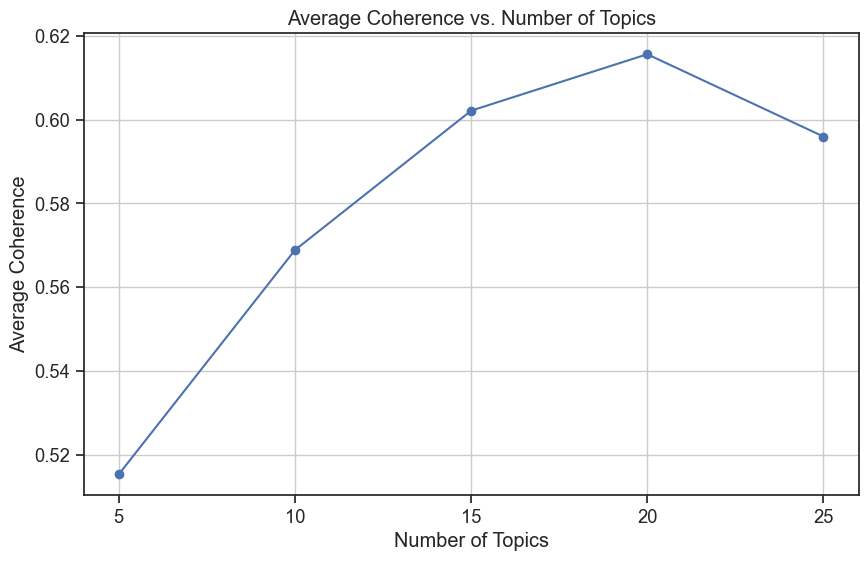

In [180]:
num_topics_list = [num_topics_5, num_topics_10, num_topics, num_topics_20, num_topics_25]
coherence_scores = [average_coherence_5, average_coherence_10, average_coherence, average_coherence_20, average_coherence_25]

plot_avg_coherence(num_topics_list, coherence_scores)


### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [181]:
# Q7a (code)
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]
topic_distributions[32]

[0.002200946,
 0.0043083844,
 0.0036468576,
 0.0024036262,
 0.08657874,
 0.003200969,
 0.005463548,
 0.0014465392,
 0.0029353348,
 0.0038162142,
 0.003990637,
 0.002834231,
 0.79383254,
 0.0024472652,
 0.0041539255,
 0.0022401977,
 0.004339404,
 0.003248483,
 0.04395964,
 0.0065221568,
 0.002467297,
 0.0028015296,
 0.0028357871,
 0.0042491658,
 0.0040765293]

In [182]:
from IPython.display import Markdown, display
import re

def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):

    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)

    topic_words = topics[topic_index]

    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n")
    print("---")

    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')

    return

In [183]:
# Display 6 documents for topic 0
get_top_docs(topics, topic_distributions, topic_index=0, n=6)

### ✨Topic 0✨

today whitehouse president great thank honor united women day live



---


✨  
**Topic Probability**: 0.0052722180262207985  
**Document**: people trump must american senate court vote country republicans right



✨  
**Topic Probability**: 0.00405860785394907  
**Document**: trump fbi russia collusion witch campaign hunt mueller obama hillary



✨  
**Topic Probability**: 0.003105476265773177  
**Document**: workers china u trade jobs wage american states billion pay



✨  
**Topic Probability**: 0.003105476265773177  
**Document**: health care people tax americans need million must country make



✨  
**Topic Probability**: 0.0029332630801945925  
**Document**: **president** impeachment democrats house schiff trump call nothing senate pelosi



✨  
**Topic Probability**: 0.0026404159143567085  
**Document**: **great** **president** economy ever country years good history big new



In [184]:
# Display 6 documents for topic 2
get_top_docs(topics, topic_distributions, topic_index=2, n=6)

### ✨Topic 2✨

health care people tax americans need million must country make



---


✨  
**Topic Probability**: 0.7064521312713623  
**Document**: **people** trump **must** american senate court vote **country** republicans right



✨  
**Topic Probability**: 0.2399875819683075  
**Document**: **health** **care** **people** **tax** **americans** **need** **million** **must** **country** **make**



✨  
**Topic Probability**: 0.19543258845806122  
**Document**: law national police enforcement order federal **people** **country** secretary stand



✨  
**Topic Probability**: 0.1752382069826126  
**Document**: great thank america maga president trump **make** see florida state



✨  
**Topic Probability**: 0.08345480263233185  
**Document**: trump fbi russia collusion witch campaign hunt mueller obama hillary



✨  
**Topic Probability**: 0.03746268153190613  
**Document**: great endorsement total strong military vote complete state amendment job



In [185]:
# Display 6 documents for topic 5
get_top_docs(topics, topic_distributions, topic_index=5, n=6)

### ✨Topic 5✨

war must climate change people energy u states united iran



---


✨  
**Topic Probability**: 0.12193746119737625  
**Document**: workers china **u** trade jobs wage american **states** billion pay



✨  
**Topic Probability**: 0.1181945949792862  
**Document**: trump via new breitbartnews york de al la city kimstrassel



✨  
**Topic Probability**: 0.08263256400823593  
**Document**: trump fbi russia collusion witch campaign hunt mueller obama hillary



✨  
**Topic Probability**: 0.007667705416679382  
**Document**: **people** trump **must** american senate court vote country republicans right



✨  
**Topic Probability**: 0.004516481887549162  
**Document**: health care **people** tax americans need million **must** country make



✨  
**Topic Probability**: 0.004266021773219109  
**Document**: president impeachment democrats house schiff trump call nothing senate pelosi



In [186]:
# Display 6 documents for topic 11
get_top_docs(topics, topic_distributions, topic_index=11, n=6)

### ✨Topic 11✨

great endorsement total strong military vote complete state amendment job



---


✨  
**Topic Probability**: 0.11785602569580078  
**Document**: trump via new breitbartnews york de al la city kimstrassel



✨  
**Topic Probability**: 0.006789209321141243  
**Document**: people trump must american senate court **vote** country republicans right



✨  
**Topic Probability**: 0.005226403474807739  
**Document**: trump fbi russia collusion witch campaign hunt mueller obama hillary



✨  
**Topic Probability**: 0.003999024163931608  
**Document**: workers china u trade jobs wage american states billion pay



✨  
**Topic Probability**: 0.003999024163931608  
**Document**: health care people tax americans need million must country make



✨  
**Topic Probability**: 0.0037772597279399633  
**Document**: president impeachment democrats house schiff trump call nothing senate pelosi



Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

# Q7b (words)
Interpreting the results, it appears that the topics generated are reflective of key issues and events that occurred during the politicians' respective terms.

For instance, Topic 2, which includes words like 'democrats', 'house', 'impeachment', 'senate', 'pelosi', 'dems', 'republicans', 'nancy', and 'president', is likely related to the impeachment proceedings against President Trump. The high probability scores for this topic on tweets from Trump suggest that this topic is more representative of Trump's views. This is likely because Trump frequently tweeted about his impeachment, thus making this topic more prominent in his tweets.

On the other hand, Topic 5, with words like 'news', 'fake', 'media', 'even', 'joe', 'biden', 'never', 'people', 'like', 'would', appears to revolve around the theme of media bias and 'fake news', a recurring theme in Trump's rhetoric. The high probability scores for this topic on tweets from Trump also suggest that this topic is more representative of his views.

It's important to note that the presence of a topic in a politician's tweets does not necessarily mean the politician endorses or agrees with that topic. They might be discussing it to criticize or refute it. Furthermore, the model's interpretation of topics is purely statistical and does not take into account the context or tone of the tweets.

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [187]:
# Create a sample of tweets

from random import sample

target_labels = sample(titles,100)

In [188]:
# Q8 (code)
# Create a heatmap using the random sample
# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap()
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks', font_scale=1.2)
def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=None):

    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution[:len(topic_keys)]):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Tweet': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Tweet',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()

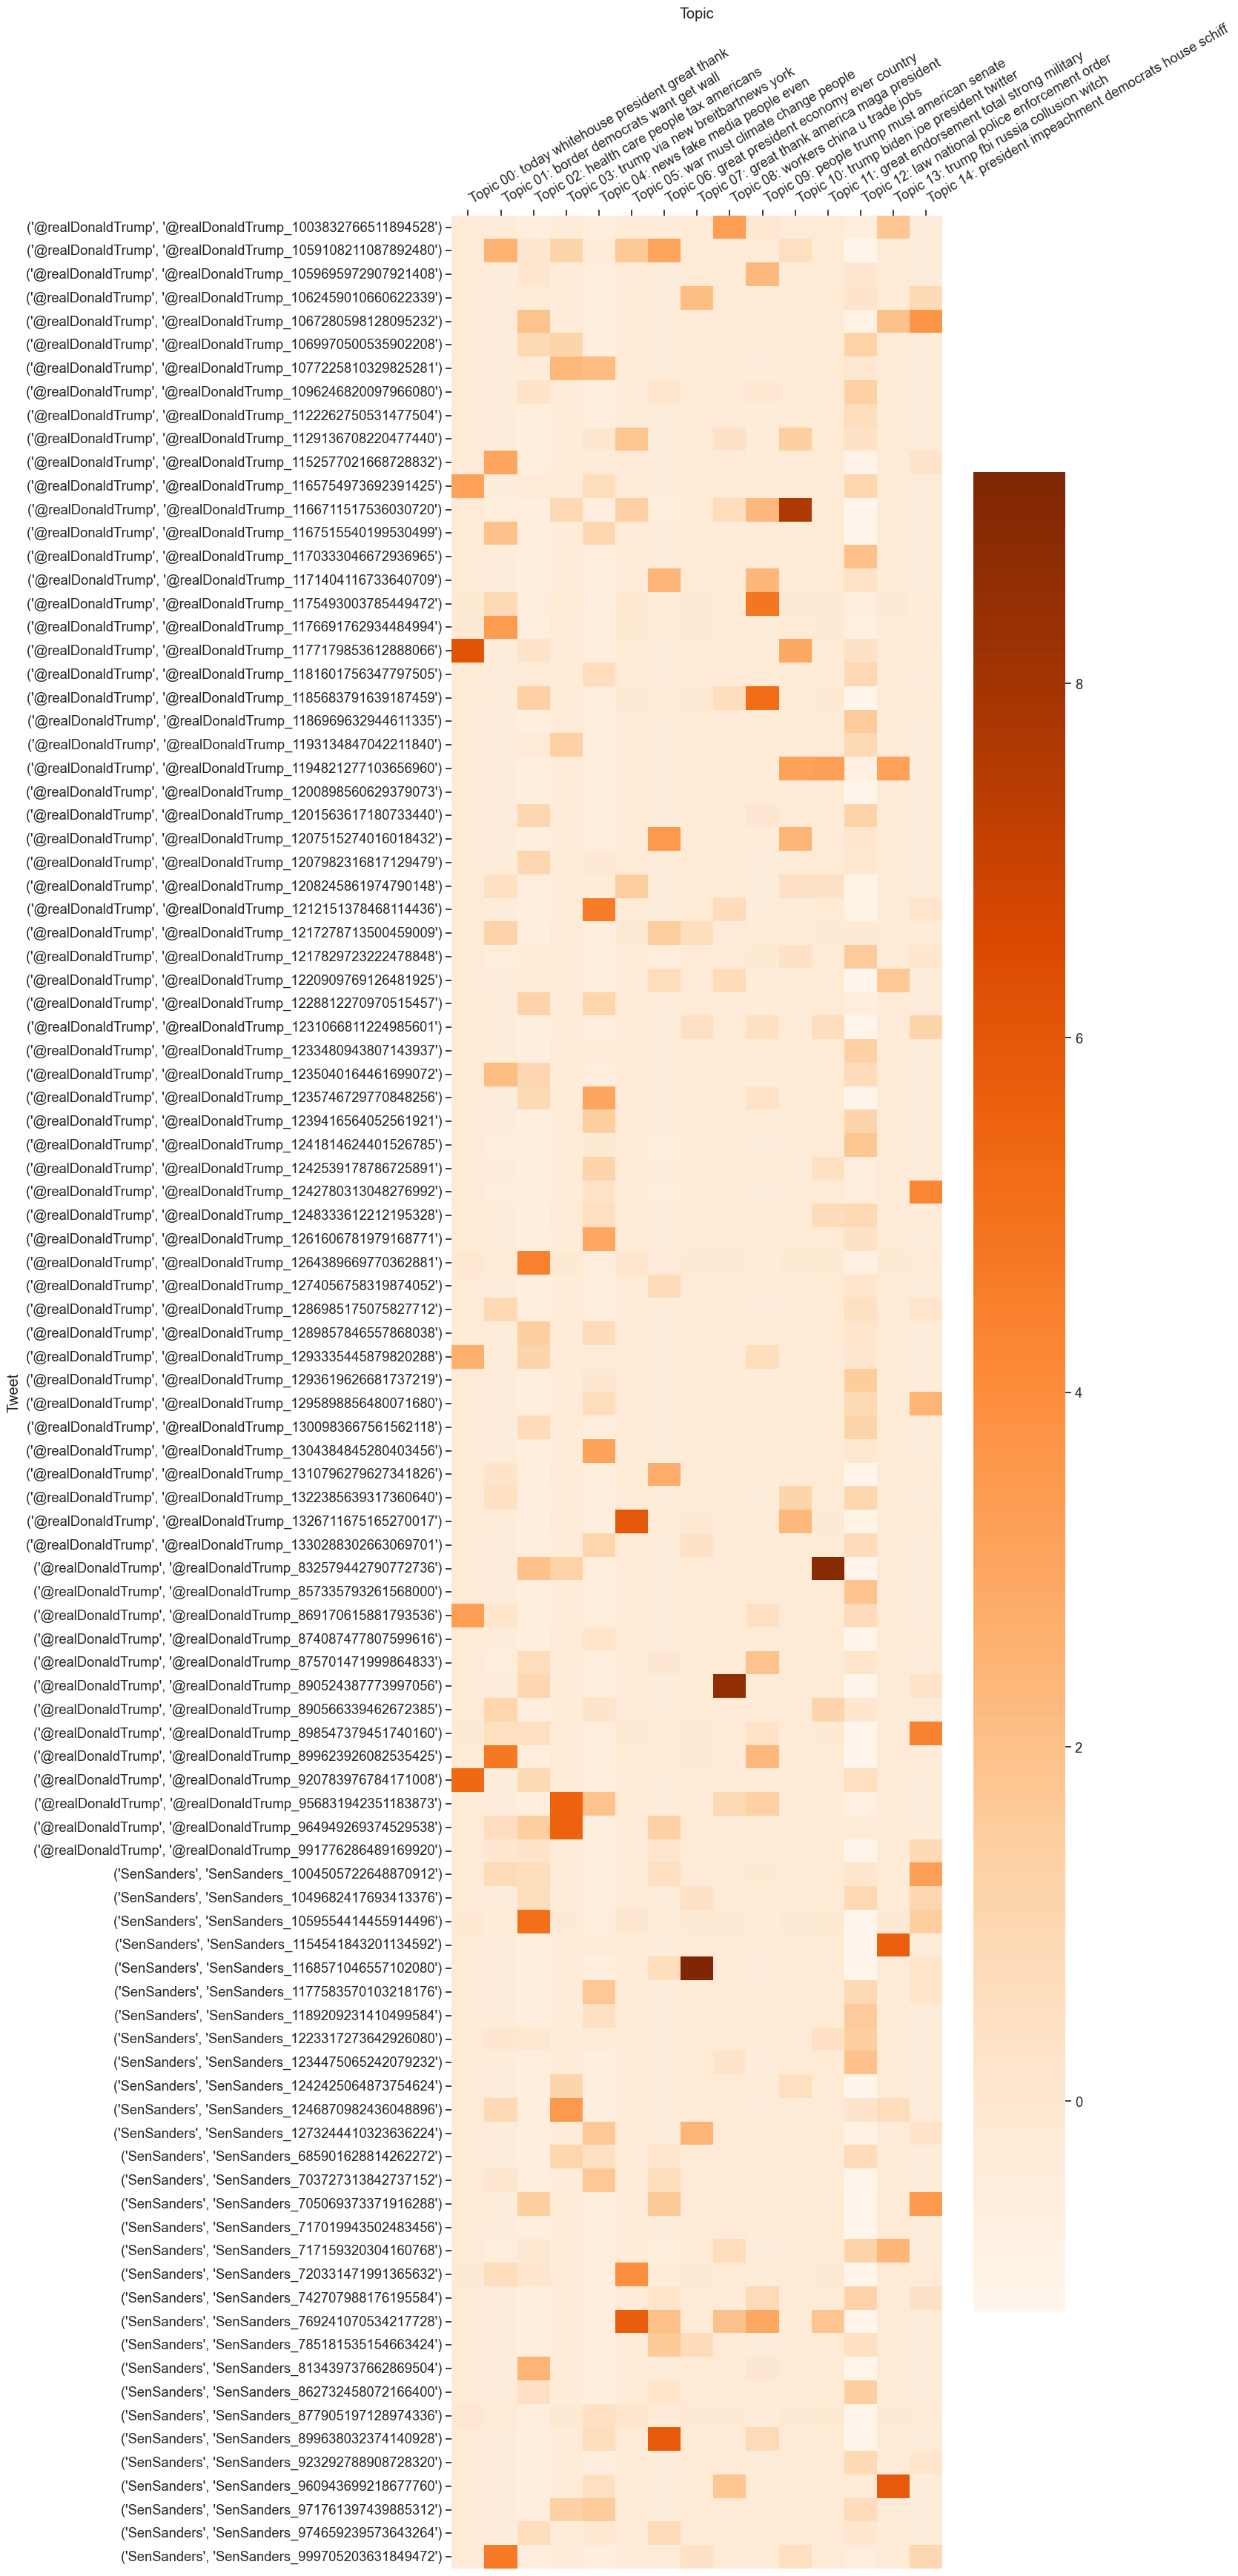

In [189]:
plot_categories_by_topics_heatmap(target_labels,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map = 'Oranges',
                                 dim=(16,35))

### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

# Q9 (words)
We can identify distinct patterns in the probability distributions of the topics associated with each politician.
Topic 05, characterized by words such as 'news', 'fake', and 'media', demonstrates a higher probability when associated with @realDonaldTrump. This pattern aligns with Donald Trump's frequent use of the term "fake news" and his public criticisms of the media, which were a significant part of his public discourse throughout his presidency.
Conversely, Topic 06, featuring words like 'health', 'care', 'people', 'must', and 'need', shows a stronger association with SenSanders. This fits Bernie Sanders' political profile as he has consistently advocated for healthcare reform and the need to address the healthcare needs of the people, especially those who are underprivileged or marginalized.
These deeper patterns reflect the distinct political narratives and public personas each politician maintains, and the topics they prioritize in their public communication.

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

In [190]:
# X2 (code)

# Filter tweets by Trump and Sanders
trump_tweets = combined_df[combined_df['Username'] == '@realDonaldTrump'].sample(50, random_state=42)
sanders_tweets = combined_df[combined_df['Username'] == 'SenSanders'].sample(50, random_state=42)

# Concatenate the balanced samples
balanced_sample = pd.concat([trump_tweets, sanders_tweets])

# Shuffle the balanced sample
balanced_sample = balanced_sample.sample(frac=1, random_state=42).reset_index(drop=True)

balanced_sample

,Username,TweetId,Title,Content,Processed_Text
0,SenSanders,1093573599980634112,SenSanders_1093573599980634112,"Mr. Trump, you are dead wrong. This is not a ""...",mr trump dead wrong hot economy percent jobs a...
1,SenSanders,949398409676558336,SenSanders_949398409676558336,This is a health crisis that no one is talking...,health crisis one talking congress act soon fu...
2,SenSanders,1067152462493159424,SenSanders_1067152462493159424,The fact that we have a President of the Unite...,fact president united states believe science i...
3,@realDonaldTrump,1087200167802163200,@realDonaldTrump_1087200167802163200,Curt Schilling deserves to be in the Baseball...,curt schilling deserves baseball hall fame gre...
4,@realDonaldTrump,1313832140287750145,@realDonaldTrump_1313832140287750145,"RT @dbongino: It’s Wednesday, October 7th 202...",dbongino wednesday october th barack obama def...
...,...,...,...,...,...
95,SenSanders,1143187172125761536,SenSanders_1143187172125761536,My colleagues @RepJayapal and @Ilhan are joini...,colleagues repjayapal ilhan joining answer que...
96,SenSanders,893499521627561984,SenSanders_893499521627561984,Vermont's Green Mountain Power continues to le...,vermont green mountain power continues lead wa...
97,@realDonaldTrump,963031666150313984,@realDonaldTrump_963031666150313984,This will be a big week for Infrastructure. A...,big week infrastructure stupidly spending tril...
98,SenSanders,1004750647445647360,SenSanders_1004750647445647360,I believe that we have become far too comforta...,believe become far comfortable united states e...


### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [ ]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)